# CC DD overlap DE clusters match gene number

In [1]:
import pandas as pd
CCDDoverlap_DEgenes = pd.read_table("CC_DD_overlap_DEgenes.csv", header=None)

/Users/yuanzan/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [32]:
def read_allFC_data_anno_xls(filepath):
    df = pd.read_excel(filepath, index_col=0)
    df = df[['gene_description', 'KEGG', 'KEGG pathway', 'NR',
       'Swissprot', 'Tremble', 'KOG', 'GO', 'Pfam', 'TF-Family', 'TF-Category',
       'TF-Classification']]
    return df

allFC_dir = "~/Documents/phd/tomato_metabolic/data/番茄转录组数据分析/DD:D/全部基因/"

D12_anno = read_allFC_data_anno_xls(allFC_dir + "D12h_vs_DD12h.all.annot.xlsx")
D24_anno = read_allFC_data_anno_xls(allFC_dir + "D24h_vs_DD24h.all.annot.xlsx")
D36_anno = read_allFC_data_anno_xls(allFC_dir + "D36h_vs_DD36h.all.annot.xlsx")
D48_anno = read_allFC_data_anno_xls(allFC_dir + "D48h_vs_DD48h.all.annot.xlsx")
D60_anno = read_allFC_data_anno_xls(allFC_dir + "D60h_vs_DD60h.all.annot.xlsx")
D72_anno = read_allFC_data_anno_xls(allFC_dir + "D72h_vs_DD72h.all.annot.xlsx")
D84_anno = read_allFC_data_anno_xls(allFC_dir + "D84h_vs_DD84h.all.annot.xlsx")
D96_anno = read_allFC_data_anno_xls(allFC_dir + "D96h_vs_DD96h.all.annot.xlsx")
D120_anno = read_allFC_data_anno_xls(allFC_dir + "D120h_vs_DD120h.all.annot.xlsx")
D168_anno = read_allFC_data_anno_xls(allFC_dir + "D168h_vs_DD168h.all.annot.xlsx")
D216_anno = read_allFC_data_anno_xls(allFC_dir + "D216h_vs_DD216h.all.annot.xlsx")


In [90]:
DD_all_anno = pd.concat([D12_anno, D24_anno, D36_anno, D48_anno, 
           D60_anno, D72_anno, D84_anno, D96_anno,
           D120_anno, D168_anno, D216_anno], axis=0)

#DD_all_anno = DD_all_anno.drop_duplicates(keep="first")
overlap_genes=pd.read_table("DD_overlap_log2fc.csv", sep="\t")
DD_all_anno["ID2"] = DD_all_anno.index

DD_all_anno = DD_all_anno.drop_duplicates(subset=["ID2"], keep="first")
overlap_anno = DD_all_anno.loc[overlap_genes.ID,:]

CC_cluster = pd.read_table("CC_FC_cm_mfuzz.csv", sep=",", index_col=0)
DD_cluster = pd.read_table("DD_FC_cm_mfuzz.csv", sep=",", index_col=0)

overlap_anno["CC_cluster"] = CC_cluster.loc[overlap_anno.index, "cluster"]
overlap_anno["DD_cluster"] = DD_cluster.loc[overlap_anno.index, "cluster"]
overlap_anno = overlap_anno.sort_values(["CC_cluster", "DD_cluster"])

In [92]:
overlap_anno.to_csv("overlap_gene_anno.csv", sep=",")

In [95]:
overlap_anno["CC_DD_cluster_match"] = overlap_anno["CC_cluster"].astype(str) + "-" + overlap_anno["DD_cluster"].astype(str)
overlap_anno["count"] = 1

In [124]:
CC_DD_cluster_match = overlap_anno[["CC_DD_cluster_match", "count"]].groupby(["CC_DD_cluster_match"]).sum()
CC_DD_cluster_match["match"] = CC_DD_cluster_match.index
CC_DD_cluster_match[["CC_match", "DD_match"]] = CC_DD_cluster_match["match"].str.split("-", expand=True) 

CC_cluster_gene_num = overlap_anno[["CC_cluster", "count"]].groupby(["CC_cluster"]).sum()
DD_cluster_gene_num = overlap_anno[["DD_cluster", "count"]].groupby(["DD_cluster"]).sum()


CC_cluster_gene_num.index = CC_cluster_gene_num.index.astype(str)
DD_cluster_gene_num.index = DD_cluster_gene_num.index.astype(str)

CC_DD_cluster_match["CC_cluster_gene_num"] = CC_cluster_gene_num.loc[CC_DD_cluster_match["CC_match"].to_list(), "count"].to_list()
CC_DD_cluster_match["DD_cluster_gene_num"] = DD_cluster_gene_num.loc[CC_DD_cluster_match["DD_match"].to_list(), "count"].to_list()

CC_DD_cluster_match["in_CC_cluster_gene_ratio"] = CC_DD_cluster_match["count"]/CC_DD_cluster_match["CC_cluster_gene_num"]
CC_DD_cluster_match["in_DD_cluster_gene_ratio"] = CC_DD_cluster_match["count"]/CC_DD_cluster_match["DD_cluster_gene_num"]

In [126]:
CC_DD_cluster_match["CC_match"] = CC_DD_cluster_match["CC_match"].astype(int)
CC_DD_cluster_match["DD_match"] = CC_DD_cluster_match["DD_match"].astype(int)

In [132]:
match_IN_CC_ratio = pd.pivot_table(CC_DD_cluster_match, values='in_CC_cluster_gene_ratio', index='CC_match',columns='DD_match')
match_IN_CC_ratio = match_IN_CC_ratio.fillna(0)

match_IN_DD_ratio = pd.pivot_table(CC_DD_cluster_match, values='in_DD_cluster_gene_ratio', index='CC_match',columns='DD_match')
match_IN_DD_ratio = match_IN_DD_ratio.fillna(0)

In [160]:
match_IN_Num = pd.pivot_table(CC_DD_cluster_match, values='count', index='CC_match',columns='DD_match')
match_IN_Num = match_IN_Num.fillna(0)

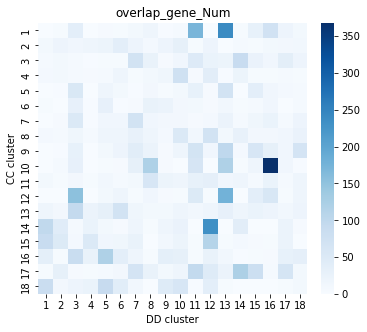

In [162]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

fig = plt.figure(figsize=(5,4.5),constrained_layout=True)
ax = fig.add_gridspec(top=0.8, right=0.8).subplots()

sns.heatmap(match_IN_Num, cmap='Blues', ax=ax)
ax.set(xlabel="DD cluster", ylabel="CC cluster", title="overlap_gene_Num")
fig.savefig("CC_DD_cluster_overlap_gene_Num.pdf")

In [4]:
def read_allFC_data_FPKM_csv(filepath):
    df = pd.read_table(filepath, index_col=0)
    df = df.loc[:, df.columns.str.contains("fpkm")]
    return df

def read_allFC_data_FPKM_xls(filepath):
    df = pd.read_excel(filepath, index_col=0)
    df = df.loc[:, df.columns.str.contains("fpkm")]
    return df

    
allFC_dir = "~/Documents/phd/tomato_metabolic/data/番茄转录组数据分析/CC:C/全部基因/"
allFC_dir2 = "~/Documents/phd/tomato_metabolic/upsetR/CC:C/"

C12_allFC = read_allFC_data_FPKM_xls(allFC_dir + "C12h_vs_CC12h.all.annot.xlsx")
C24_allFC = read_allFC_data_FPKM_csv(allFC_dir2 + "newdata/C24_rmC24-3_new_DE.xls")
C36_allFC = read_allFC_data_FPKM_xls(allFC_dir + "C36h_vs_CC36h.all.annot.xlsx")
C48_allFC = read_allFC_data_FPKM_xls(allFC_dir + "C48h_vs_CC48h.all.annot.xlsx")
C60_allFC = read_allFC_data_FPKM_xls(allFC_dir + "C60h_vs_CC60h.all.annot.xlsx")
C72_allFC = read_allFC_data_FPKM_xls(allFC_dir + "C72h_vs_CC72h.all.annot.xlsx")
C84_allFC = read_allFC_data_FPKM_csv(allFC_dir2 + "newdata/C84_rmC84-2_new_DE.xls")
C96_allFC = read_allFC_data_FPKM_xls(allFC_dir + "C96h_vs_CC96h.all.annot.xlsx")
C120_allFC = read_allFC_data_FPKM_xls(allFC_dir + "C120h_vs_CC120h.all.annot.xlsx")
C168_allFC = read_allFC_data_FPKM_xls(allFC_dir + "C168h_vs_CC168h.all.annot.xlsx")
C216_allFC = read_allFC_data_FPKM_xls(allFC_dir + "C216h_vs_CC216h.all.annot.xlsx")

KeyboardInterrupt: 

In [18]:
del C24_allFC["C24h.3_fpkm"]
del C84_allFC["C84h.2_fpkm"]

In [59]:
    
DDallFC_dir = "~/Documents/phd/tomato_metabolic/data/番茄转录组数据分析/DD:D/全部基因/"

D12_allFC = read_allFC_data_FPKM_xls(DDallFC_dir + "D12h_vs_DD12h.all.annot.xlsx")
D24_allFC = read_allFC_data_FPKM_xls(DDallFC_dir + "D24h_vs_DD24h.all.annot.xlsx")
D36_allFC = read_allFC_data_FPKM_xls(DDallFC_dir + "D36h_vs_DD36h.all.annot.xlsx")
D48_allFC = read_allFC_data_FPKM_xls(DDallFC_dir + "D48h_vs_DD48h.all.annot.xlsx")
D60_allFC = read_allFC_data_FPKM_xls(DDallFC_dir + "D60h_vs_DD60h.all.annot.xlsx")
D72_allFC = read_allFC_data_FPKM_xls(DDallFC_dir + "D72h_vs_DD72h.all.annot.xlsx")
D84_allFC = read_allFC_data_FPKM_xls(DDallFC_dir + "D84h_vs_DD84h.all.annot.xlsx")
D96_allFC = read_allFC_data_FPKM_xls(DDallFC_dir + "D96h_vs_DD96h.all.annot.xlsx")
D120_allFC = read_allFC_data_FPKM_xls(DDallFC_dir + "D120h_vs_DD120h.all.annot.xlsx")
D168_allFC = read_allFC_data_FPKM_xls(DDallFC_dir + "D168h_vs_DD168h.all.annot.xlsx")
D216_allFC = read_allFC_data_FPKM_xls(DDallFC_dir + "D216h_vs_DD216h.all.annot.xlsx")

In [22]:
CC_all_fpkm = pd.concat([C12_allFC, C24_allFC, C36_allFC, C48_allFC, C60_allFC, 
           C72_allFC, C84_allFC, C96_allFC, 
           C120_allFC, C168_allFC, C216_allFC], 
          axis=1)

In [24]:
CC_all_fpkm = CC_all_fpkm.fillna(0)

In [25]:
import scanpy as sc
import anndata as ad

In [61]:
CC_adata = ad.AnnData(CC_all_fpkm.T)
CC_adata.obs["sample"] = CC_adata.obs.index
CC_adata.obs["sample"] = CC_adata.obs.index
CC_adata.obs["HAG"] = CC_adata.obs["sample"].str.split('(\d+)([A-Za-z]+)', expand=True)[1]
CC_adata.obs["Condition"] = CC_adata.obs["sample"].str.split('(\d+)([A-Za-z]+)', expand=True)[0]

In [62]:
DD_all_fpkm = pd.concat([D12_allFC, D24_allFC, D36_allFC, D48_allFC, D60_allFC, 
           D72_allFC, D84_allFC, D96_allFC, 
           D120_allFC, D168_allFC, D216_allFC], 
          axis=1)

DD_all_fpkm = DD_all_fpkm.fillna(0)

DD_adata = ad.AnnData(DD_all_fpkm.T)
DD_adata.obs["sample"] = DD_adata.obs.index
DD_adata.obs["sample"] = DD_adata.obs.index
DD_adata.obs["HAG"] = DD_adata.obs["sample"].str.split('(\d+)([A-Za-z]+)', expand=True)[1]
DD_adata.obs["Condition"] = DD_adata.obs["sample"].str.split('(\d+)([A-Za-z]+)', expand=True)[0]

In [66]:
CC_DD_adata = ad.AnnData.concatenate(CC_adata, DD_adata)

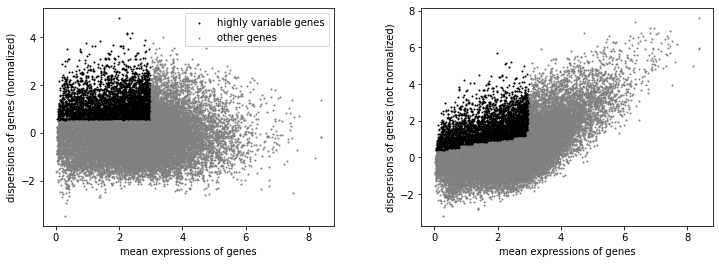

In [69]:
CC_DD_adata.var_names_make_unique()
sc.pp.log1p(CC_DD_adata)
sc.pp.highly_variable_genes(CC_DD_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(CC_DD_adata)

In [70]:
CC_DD_adata.raw = CC_DD_adata
sc.pp.scale(CC_DD_adata, max_value=10)


In [71]:
sc.tl.pca(CC_DD_adata, svd_solver='arpack')

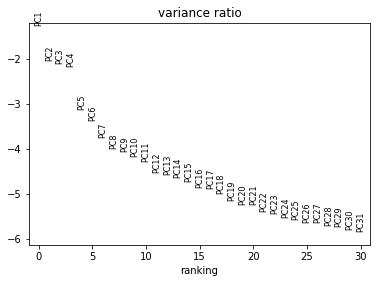

In [72]:
sc.pl.pca_variance_ratio(CC_DD_adata, log=True)

In [73]:
sc.pp.neighbors(CC_DD_adata, n_neighbors=10, n_pcs=25)

In [74]:
sc.tl.umap(CC_DD_adata)
sc.tl.leiden(CC_DD_adata)

In [76]:
CC_DD_adata.obs["HAG-T"] = CC_DD_adata.obs["HAG"].astype(int)

/Users/yuanzan/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:364: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/yuanzan/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:364: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


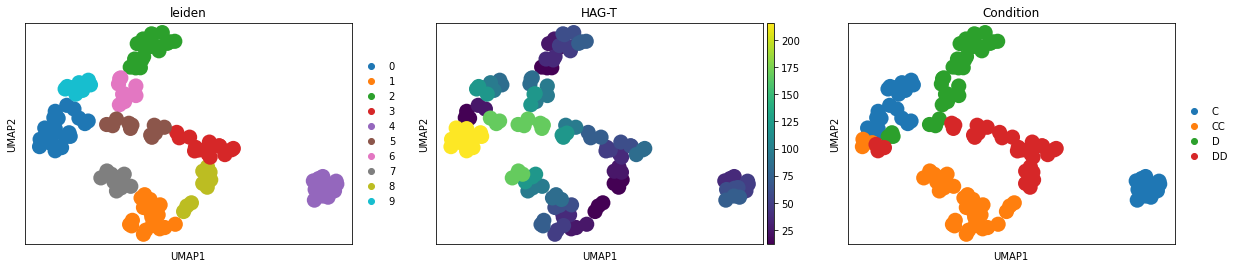

In [77]:
sc.pl.umap(CC_DD_adata, color=['leiden', 'HAG-T', 'Condition'])

In [78]:
CC_DD_adata.write("CC_DD_fpkm.h5ad")

In [56]:


#CC_adata.obs["HAG"] = CC_adata.obs["HAG"].str.split("h-", expand=True)[0]

,0,1,2,3
C12h-1_fpkm,C,12,h,-1_fpkm
C12h-2_fpkm,C,12,h,-2_fpkm
C12h-3_fpkm,C,12,h,-3_fpkm
CC12h-1_fpkm,CC,12,h,-1_fpkm
CC12h-2_fpkm,CC,12,h,-2_fpkm
...,...,...,...,...
C216h-2_fpkm,C,216,h,-2_fpkm
C216h-3_fpkm,C,216,h,-3_fpkm
CC216h-1_fpkm,CC,216,h,-1_fpkm
CC216h-2_fpkm,CC,216,h,-2_fpkm
